In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
atom = pn.Atom('O', 3)

In [3]:
# Let's generate an array of densities
dens = np.logspace(1, 8, 100)

In [4]:
# Let's get the population of the levels at a given Te, for these densities
Te = 1e4
pops = atom.getPopulations(Te, dens)
# Let's get the level crtical densities
crit_dens = atom.getCritDensity(Te)

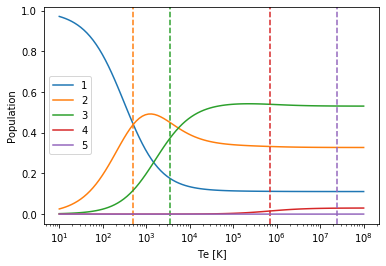

In [5]:
# Plot the evolution of the populations while the density increases
# The vertical lines indicate the critical densities of the different levels
f, ax = plt.subplots()
i = 1
for pop, crit_den in zip(pops, crit_dens): 
    pl1 = ax.plot(dens, pop, label=i)
    ax.axvline(crit_den, c=pl1[0].get_color(), ls='--')
    i += 1
ax.set_xscale('log')
ax.legend()
ax.set_xlabel('Te [K]')
ax.set_ylabel('Population');

We can see that the LTE is obtained when the density is quite high (i.e. when the level populations are stabilized, above 1e7 cm-3).